<a href="https://colab.research.google.com/github/ppprakharr/LogisticRegression/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# taking the user data csv to dataframe
heart_dataset = pd.read_csv('/content/heart_disease_data.csv')

In [3]:
# checking the data
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#gathering info of the dataset
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#checking for null
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# some statistical data
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#checking the distributio of target variable
heart_dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1--->defective heart
0---> healthy heart

Understanding the relationship or correlation between feature

In [9]:
correlation = heart_dataset.corr()

<Axes: >

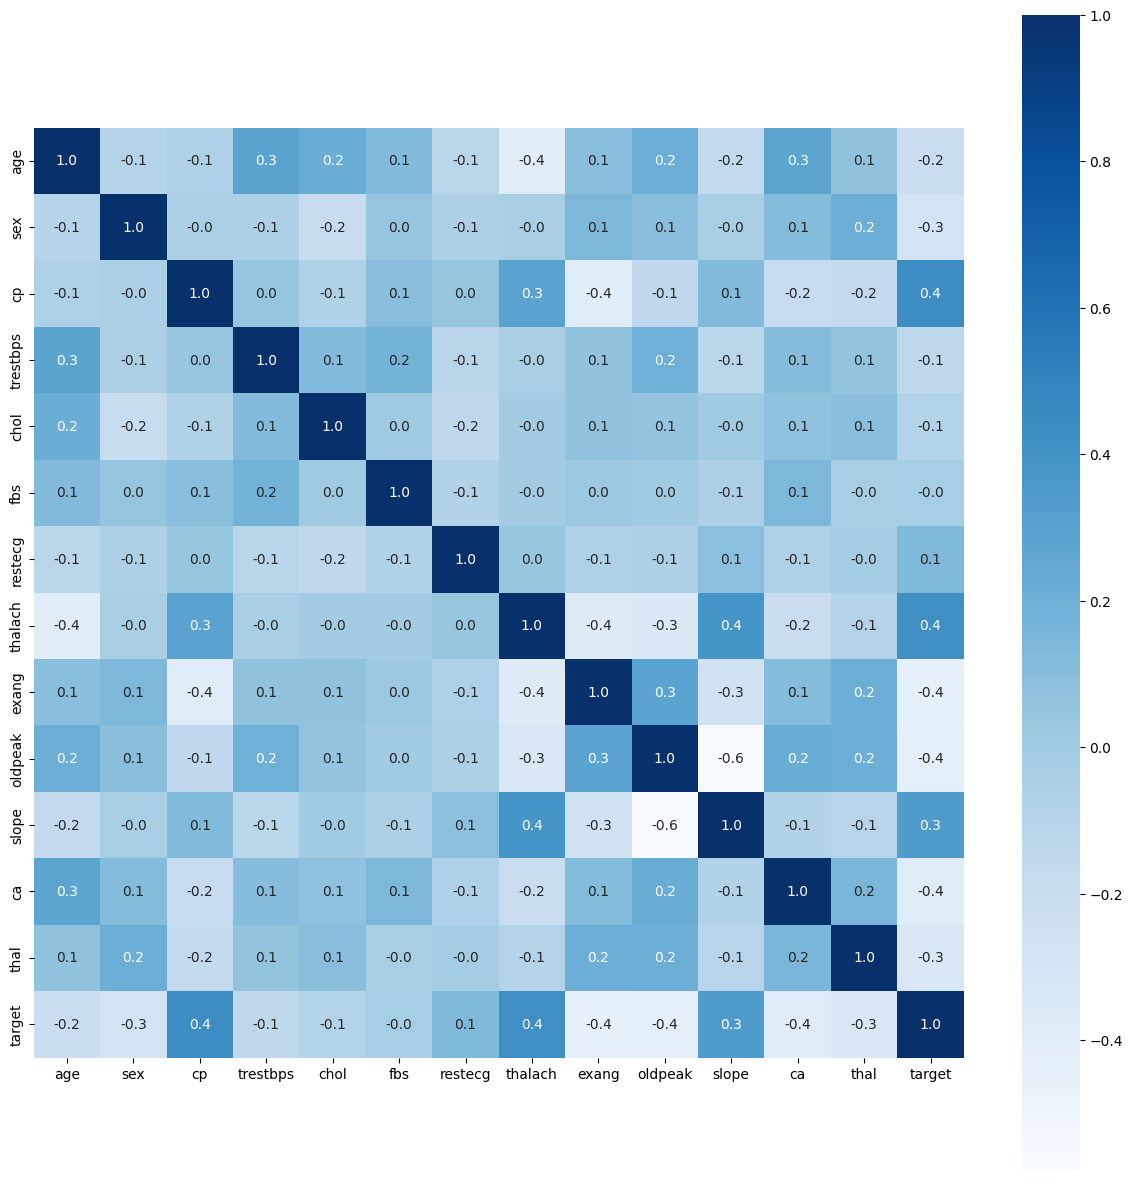

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':10},fmt='0.1f',cmap='Blues')

Splitting the target and dataset

In [12]:
x=heart_dataset.drop(columns=['fbs','target'],axis=1)
y=heart_dataset['target']
print(x)
print(y)

     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   3       145   233        0      150      0      2.3      0   
1     37    1   2       130   250        1      187      0      3.5      0   
2     41    0   1       130   204        0      172      0      1.4      2   
3     56    1   1       120   236        1      178      0      0.8      2   
4     57    0   0       120   354        1      163      1      0.6      2   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   57    0   0       140   241        1      123      1      0.2      1   
299   45    1   3       110   264        1      132      0      1.2      1   
300   68    1   0       144   193        1      141      0      3.4      1   
301   57    1   0       130   131        1      115      1      1.2      1   
302   57    0   1       130   236        0      174      0      0.0      1   

     ca  thal  
0     0     1  
1     0     2  
2     0     2  

Splitting the data into training and testing data

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, random_state=8,stratify=y)


In [36]:
print(x.shape,x_train.shape, x_test.shape)

(303, 12) (272, 12) (31, 12)


Model Training

Logistic Regression

In [37]:
logistic_model = LogisticRegression()

In [38]:
# training the model
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# evaluating the model
x_train_pred = logistic_model.predict(x_train)
acc_score = accuracy_score(x_train_pred,y_train)
print('Accuracy_score for training data LR = ',acc_score)

Accuracy_score for training data LR =  0.8455882352941176


In [40]:
# accuracy on test data
x_test_pred = logistic_model.predict(x_test)
acc_score = accuracy_score(x_test_pred,y_test)
print('Accuracy_score for testing data LR = ',acc_score)

Accuracy_score for testing data LR =  0.9032258064516129


Building a predictive system

In [48]:
input_data = (68,1,0,144,193,1,141,0,3.4,1,2,3)
input_data_as_array = np.asarray(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)
prediction = logistic_model.predict(input_data_reshape)
print(prediction)
if(prediction[0]==1):
  print('Unhealthy heart')
else:
  print('Healthy Heart')

[0]
Healthy Heart


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model Training

XGBClassification

In [42]:
xgb_model = XGBClassifier()

In [43]:
# training the model
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
# evaluating the model
x_train_pred = xgb_model.predict(x_train)
acc_score = accuracy_score(x_train_pred,y_train)
print('Accuracy_score for training data LR = ',acc_score)

Accuracy_score for training data LR =  1.0


In [45]:
# accuracy on test data
x_test_pred = xgb_model.predict(x_test)
acc_score = accuracy_score(x_test_pred,y_test)
print('Accuracy_score for testing data LR = ',acc_score)

Accuracy_score for testing data LR =  0.8709677419354839


Building a predictive system

In [47]:
input_data = (68,1,0,144,193,1,141,0,3.4,1,2,3)
input_data_as_array = np.asarray(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)
prediction = logistic_model.predict(input_data_reshape)
print(prediction)
if(prediction[0]==1):
  print('Unhealthy heart')
else:
  print('Healthy Heart')

[0]
Healthy Heart


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
